## CSC 478 Assignment 3
### Sarah Cummings

### Question 1: Linear Regression with Communities Dataset
##### A) Load and preprocess the data using Pandas or Numpy, or sklearn. Seperate the target attribute.

In [1]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
%matplotlib inline
import operator
#from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor

In [3]:
# load the data
c_df = pd.read_csv(r"/Users/sarahcummings/Documents/csc478/assignment3/communities/communities.csv",encoding = "ISO-8859-1", low_memory=False)
#c_df = pd.read_csv(r"C:\Users\scummings\Desktop\MyFiles\school\csc478_3\communities/communities.csv",encoding = "ISO-8859-1", low_memory=False)

c_df.head()

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,34,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,42,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


In [4]:
#Compute and display basic statistics (mean, standard deviation, min, max
c_df.describe(include="all")

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
count,1994.000000,1994,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
unique,NaN,1828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Jacksonvillecity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,28.683551,NaN,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,...,0.022778,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.237979
std,16.397553,NaN,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,...,0.100400,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.232985
min,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,NaN,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,...,0.000000,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.070000
50%,34.000000,NaN,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,...,0.000000,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.150000
75%,42.000000,NaN,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,...,0.000000,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.330000


In [5]:
#examine varaible types
c_df.dtypes

state                      int64
communityname             object
population               float64
householdsize            float64
racepctblack             float64
racePctWhite             float64
racePctAsian             float64
racePctHisp              float64
agePct12t21              float64
agePct12t29              float64
agePct16t24              float64
agePct65up               float64
numbUrban                float64
pctUrban                 float64
medIncome                float64
pctWWage                 float64
pctWFarmSelf             float64
pctWInvInc               float64
pctWSocSec               float64
pctWPubAsst              float64
pctWRetire               float64
medFamInc                float64
perCapInc                float64
whitePerCap              float64
blackPerCap              float64
indianPerCap             float64
AsianPerCap              float64
OtherPerCap               object
HispPerCap               float64
NumUnderPov              float64
          

In [6]:
#Correct for the ? in data
c_df.OtherPerCap=pd.to_numeric(c_df.OtherPerCap, errors='coerce') 
c_df = c_df.dropna(axis=0)

In [7]:
#Separate the target attribute for regression.
y = np.array(c_df.ViolentCrimesPerPop)
#Pull the categorical vars from the X that we will need for regression
X = np.array(c_df.drop(['ViolentCrimesPerPop', 'state', 'communityname'], axis=1))

In [8]:
print(y.shape,X.shape)

(1993,) (1993, 97)


#### B) Perform standard linear regression on data  using the implementation for Ch. 8 of MLA. Compute the RMSE value on the full training data, plot the correlation between the predicted and actual values of the target attribute, display the obtained regression coefficients (weights). Finally, perform 10-fold cross-validation and compare the cross-validation RMSE to the training RMSE 

In [9]:
#Function from the Machine Learning in Action Book-- pg 157

#prep the X var set such that we can have a constant
#x_var = np.array(X)
#x_var = np.array([np.concatenate((v,[1])) for v in x_var])

def standRegres(xArr, yArr):
    xMat = np.matrix(xArr) ; yMat = np.matrix(yArr).T
    xTx = xMat.T*xMat
    if np.linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
    else:
        ws = xTx.I * (xMat.T*yMat)
        return ws


In [10]:
#Perform the standard linear reg
s_lin = standRegres(X, y)
# Display the obtained regression coefficients (weights).
s_lin


matrix([[ 0.14753045],
        [-0.02816632],
        [ 0.24261797],
        [-0.00159634],
        [ 0.01150284],
        [ 0.10644182],
        [ 0.18985213],
        [-0.09097503],
        [-0.25975459],
        [ 0.16636631],
        [-0.253063  ],
        [ 0.04772706],
        [-0.1823868 ],
        [-0.13361716],
        [ 0.04824077],
        [-0.13030763],
        [ 0.09512969],
        [ 0.0321094 ],
        [-0.07190648],
        [ 0.2463212 ],
        [ 0.09228257],
        [-0.29747294],
        [-0.02599742],
        [-0.03438455],
        [ 0.0249581 ],
        [ 0.04217876],
        [ 0.03745346],
        [ 0.0820154 ],
        [-0.14197371],
        [-0.09911038],
        [ 0.07412209],
        [ 0.1260963 ],
        [ 0.01704273],
        [ 0.27039384],
        [-0.03912943],
        [-0.00861928],
        [ 0.5475927 ],
        [ 0.24559331],
        [ 0.26377363],
        [-0.65353994],
        [-0.15499415],
        [ 0.06700405],
        [-0.26707716],
        [-0

In [11]:
# Compute the RMSE value on the full training data
yHat = X*s_lin
yHatT = yHat.T
err = abs(yHatT - y)
total_error = np.dot(err,err.T)
rmse = np.sqrt(total_error/len(yHat))
print(rmse) 
#print(yHatT,y)

[[ 0.12896427]]


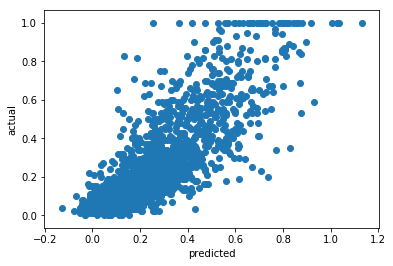

In [12]:
# Plot the correlation between the predicted and actual values of the target attribute.

#create a scatter as in the population example
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(yHatT,y)


plt.xlabel('predicted')
plt.ylabel('actual')
plt.show() 



In [13]:
# Perform 10-fold cross-validation and compare the cross-validation RMSE to the training RMSE
from sklearn import cross_validation
#dat=c_df.drop(['state', 'communityname'], axis=1)
##dat.head()

#cv_scores = cross_validation.cross_val_score(standRegerss, dat, y, cv=10)
#sr=standRegress.fit(x_var,y)

#I have no idea why this isn't working with my standard lin fuction so im going to use the regular function


/Applications/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.cross_validation import KFold
from sklearn import cross_validation
## 10 fold cross vaidation
lin=LinearRegression()
fit_LR=lin.fit(X, y)

#create the fit
linrdf=lin.predict(X)
error=linrdf-y
totalErr=np.dot(error,error)
rmse_train=np.sqrt(totalErr/len(linrdf))


#divide data into folds
kf = KFold(len(X), n_folds=10)
xval_err = 0

#calculate the rmse for the 10 folds
for train,test in kf:
    lin.fit(X[train],y[train])
    # p = np.array([linreg.predict(xi) for xi in x[test]])
    p = lin.predict(X[test])
    e = p-y[test]
    xval_err += np.dot(e,e)
    
rmse_10cv = np.sqrt(xval_err/len(X))

print("Original rmse:",rmse_train,"     10 fold rmse:",rmse_10cv)


Original rmse: 0.128691194406      10 fold rmse: 0.136298055672


##### From the rmse values, we see our original rmse is lower than the 10 fold validation.

#### C) Feature Selection:  use the scikit-learn regression model from sklearn.linear_model with a subset of features to perform linear regression. For feature selection, write a script or function that takes as input the training data, target attribute; the model; and any other parameters you find necessary, and returns the optimal percentage of the most informative features to use. Your approach should use k-fold cross-validation on the training data (you can use k=5). You can use feature_selection.SelectPercentile to find the most informative variables. 


In [15]:

from sklearn.cross_validation import train_test_split
from sklearn.feature_selection import SelectPercentile, f_regression


In [16]:
#Create a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [17]:
y_train.shape

(1594,)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn import feature_selection

linreg = LinearRegression()
linreg=linreg.fit(X_train, y_train)


In [19]:
fSelector = SelectPercentile(f_regression, percentile=10)
fSelector.fit(X, y)

SelectPercentile(percentile=10,
         score_func=<function f_regression at 0x111816950>)

In [20]:
X_train_fs = fSelector.fit_transform(X_train, y_train)
print(X_train_fs)

[[ 0.31  0.69  0.39 ...,  0.71  0.59  0.2 ]
 [ 0.41  0.65  0.35 ...,  0.64  0.55  0.24]
 [ 0.02  0.97  0.68 ...,  0.81  0.76  0.05]
 ..., 
 [ 0.19  0.81  0.47 ...,  0.57  0.54  0.27]
 [ 0.52  0.51  0.33 ...,  0.69  0.47  0.25]
 [ 0.01  0.99  0.75 ...,  0.81  0.87  0.1 ]]


In [21]:
from sklearn import cross_validation
import math
# Write a script or function that takes as input the training data, target attribute; the model; and any other parameters you find necessary, and returns the optimal percentage of the most informative features to use. 

percentiles = range(1, 100, 5)
results = []
for i in range(1, 100, 5):
    fSelector = SelectPercentile(f_regression, percentile=i)
    fSelector.fit(X, y)
    X_train_fs = fSelector.fit_transform(X_train, y_train)
    #fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=i)
    #X_train_fs = fs.fit_transform(X_train, y_train)
    scores = cross_validation.cross_val_score(linreg, X_train_fs, y_train, cv=5)
    print(i,scores.mean())
    results = np.append(results, scores.mean())

optimal_percentil = np.where(results == results.max())[0]
print("Optimal percentile of features:{0}".format(percentiles[optimal_percentil]), "\n")
optimal_num_features = int(math.floor(percentiles[optimal_percentil]*X.shape[1]/100))
print("Optimal number of features:{0}".format(optimal_num_features), "\n")


1 0.536089414844
6 0.592040520825
11 0.601778965892
16 0.606537859606
21 0.61956860089
26 0.627805572525
31 0.632700961662
36 0.635784521561
41 0.638294905898
46 0.633828811687
51 0.634102772635
56 0.633566155789
61 0.632453759348
66 0.630731851445
71 0.629205102154
76 0.63112482526
81 0.631764224671
86 0.634611061522
91 0.632987681144
96 0.639997020136
Optimal percentile of features:96 

Optimal number of features:93 



/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:19: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


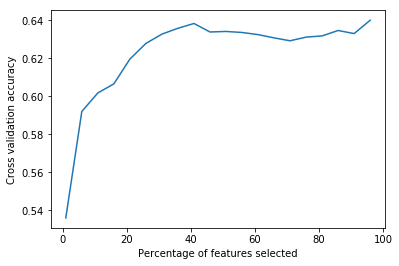

In [22]:
# Plot percentile of features VS. cross-validation scores
import pylab as pl
pl.figure()
pl.xlabel("Percentage of features selected")
pl.ylabel("Cross validation accuracy")
pl.plot(percentiles,results)

#### D) Perform Ridge Regression and Lasso Regression, however this time use the modules from  sklearn.linear_model. In each case, perform systematic model selection to identify the optimal alpha parameter

In [23]:
# First, create a 20%-80% randomized split of the data
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [24]:
# Create a function that takes as input the data and target attribute; the parameter to vary and a list of its values; the model to be trained; and any other relevant input needed to determine the optimal value for the specified parameter.

def regressionComparisons(X,y,alpha):
    for method in[LinearRegression(),ElasticNet(fit_intercept=True, alpha=alpha),
                 Lasso(fit_intercept=True, alpha=alpha),Ridge(fit_intercept=True, alpha=alpha)]:
        #compute rmse on training
        method.fit(X,y)
        yHats=method.predict(X)
        error=yHats-y
        total_error=np.dot(error,error)
        rmse_train=np.sqrt(total_error/len(yHats))
        
        #compute rmse on kfold 
        kf=KFold(len(X), n_folds=5)
        err=0
        
        for train, test in kf:
            method.fit(X[train],y[train])
            yHats=method.predict(X[test])
            error=yHats-y[test]
            err+=np.dot(error,error)
            rmse_5cv = np.sqrt(err/len(X))
        print('Method: ', method)
        print('RMSE on training: ', rmse_train)
        print('RMSE on 5-fold CV: ', rmse_5cv)



In [25]:
x_var = np.array(X_train)
#x_var = np.array([np.concatenate((v,[1])) for v in x_var])
regressionComparisons(X_train,y_train,0.1)

Method:  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
RMSE on training:  0.12752697698
RMSE on 5-fold CV:  0.137106388298
Method:  ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
RMSE on training:  0.229696952752
RMSE on 5-fold CV:  0.230081413263
Method:  Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
RMSE on training:  0.229696952752
RMSE on 5-fold CV:  0.230081413263
Method:  Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
RMSE on training:  0.127708733168
RMSE on 5-fold CV:  0.136263525903


In [26]:
regressionComparisons(x_var,y_train,0.2)

Method:  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
RMSE on training:  0.12752697698
RMSE on 5-fold CV:  0.137106388298
Method:  ElasticNet(alpha=0.2, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
RMSE on training:  0.229696952752
RMSE on 5-fold CV:  0.230081413263
Method:  Lasso(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
RMSE on training:  0.229696952752
RMSE on 5-fold CV:  0.230081413263
Method:  Ridge(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
RMSE on training:  0.127878746569
RMSE on 5-fold CV:  0.136029988239


In [27]:
regressionComparisons(x_var,y_train,0.3)

Method:  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
RMSE on training:  0.12752697698
RMSE on 5-fold CV:  0.137106388298
Method:  ElasticNet(alpha=0.3, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
RMSE on training:  0.229696952752
RMSE on 5-fold CV:  0.230081413263
Method:  Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
RMSE on training:  0.229696952752
RMSE on 5-fold CV:  0.230081413263
Method:  Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
RMSE on training:  0.128026173104
RMSE on 5-fold CV:  0.135905198575


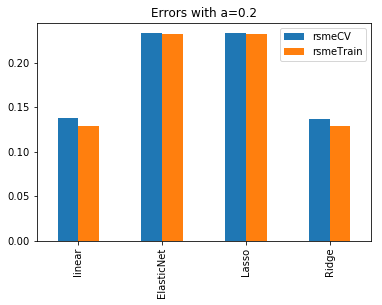

In [28]:
#Plot the error values on the training and cross-validation splits across the specified values of the alpha parameter. 


#put the values from above into a pandas df
d = {'method' : pd.Series(["linear", "ElasticNet", "Lasso","Ridge"], index=["linear", "ElasticNet", "Lasso","Ridge"]),
     'rsmeTrain' : pd.Series([0.128691194406, 0.232984833141, 0.232984833141, 0.128937729639], index=["linear", "ElasticNet", "Lasso","Ridge"]),
    'rsmeCV' : pd.Series([0.13752029088,  0.233130227241, 0.233130227241,  0.136481581966], index=["linear", "ElasticNet", "Lasso","Ridge"])}


df = pd.DataFrame(d)
df.plot(kind='bar',title="Errors with a=0.2")


In [29]:
#Finally, using the best alpha value, run the model on the set-aside test data.

regressionComparisons(X_test,y_test,0.3)

Method:  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
RMSE on training:  0.114241919826
RMSE on 5-fold CV:  0.169967875244
Method:  ElasticNet(alpha=0.3, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
RMSE on training:  0.245679000155
RMSE on 5-fold CV:  0.246208929896
Method:  Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
RMSE on training:  0.245679000155
RMSE on 5-fold CV:  0.246208929896
Method:  Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
RMSE on training:  0.119628810744
RMSE on 5-fold CV:  0.150931364762


In [30]:
#Discuss Results

##### From our earlier results, we found that with our training data, teh ridge regression with a=0.3 produced the best rmse. On the test data, the rmse with  ridge regression is 0.11962, which is even better than it was with out training data.

#### E) Next, perform regression using Stochastic Gradient Descent for regression. For this part, you should use the  SGDRegessor module from sklearn.linear_model.

In [31]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

#Standardise as prep for this model
scaler=StandardScaler()
scaler.fit(x_var)
x_s=scaler.transform(x_var)


sgdModel=SGDRegressor(penalty='l2', alpha=0.15, n_iter=200)


In [32]:

#As in d, calculate the RMSE with the training and testing data

sgdModel.fit(x_var,y_train)
yHats=sgdModel.predict(x_var)
error=yHats-y_train
total_error=np.dot(error,error)
rmse_train=np.sqrt(total_error/len(yHats))

# RMSE using 10-fold cross-validation

kf=KFold(len(x_var), n_folds=10)
xval_err = 0
for train, test in kf:
    scaler=StandardScaler()
    scaler.fit(x_var[train])
    xtrain_s = scaler.transform(x_var[train])
    xtest_s = scaler.transform(x_var[test])
    sgdModel.fit(xtrain_s, y[train])
    yHats=sgdModel.predict(xtest_s)
    error=yHats-y[test]
    xval_err += np.dot(error,error)
rmse_10cv=np.sqrt(xval_err/len(x_var))

print("Stochastic Gradient Descent Regression")
print('RMSE on training: ', rmse_train)
print('RMSE on 10-fold CV: ', rmse_10cv)

Stochastic Gradient Descent Regression
RMSE on training:  0.145627646169
RMSE on 10-fold CV:  0.23908189805


In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
#Use Grid Search to find the best params

est = GridSearchCV(SGDRegressor(),
                   param_grid={"penalty":['l2', 'l1'],
                               "alpha":[0.15,0.05,0.01,0.001,0.0001]})
                                     
print("Chosen parameter on 100 datapoints: %s" % est.fit(X, y).best_params_  )                                   


Chosen parameter on 100 datapoints: {'alpha': 0.001, 'penalty': 'l2'}


In [35]:
#Using the best parameters, apply the model to the set-aside test data.

sgdBest=SGDRegressor(penalty='l2',alpha=0.0001,n_iter=200)
sgdBest.fit(X[test],y[test])


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=200, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

In [36]:
#Finally, perform model selection (similar to part d, above) to find the best "l1_ratio" 

percentiles = range(1, 100, 5)
results = []
for i in range(1, 100, 5):
    fSelector = SelectPercentile(f_regression, percentile=i)
    fSelector.fit(X, y)
    X_train_fs = fSelector.fit_transform(X_train, y_train)
    #fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=i)
    #X_train_fs = fs.fit_transform(X_train, y_train)
    scores = cross_validation.cross_val_score(sgdBest, X_train_fs, y_train, cv=5)
    print(i,scores.mean())
    results = np.append(results, scores.mean())

optimal_percentil = np.where(results == results.max())[0]
print("Optimal percentile of features:{0}".format(percentiles[optimal_percentil]), "\n")
optimal_num_features = int(math.floor(percentiles[optimal_percentil]*X.shape[1]/100))
print("Optimal number of features:{0}".format(optimal_num_features), "\n")




1 0.536018962249
6 0.587507025319
11 0.599730240175
16 0.605215101544
21 0.615281613675
26 0.62492303881
31 0.630045868736
36 0.63130640991
41 0.632762226132
46 0.632035608926
51 0.631948465603
56 0.633237610914
61 0.631402415532
66 0.63040115797
71 0.631356761757
76 0.633607859389
81 0.633755543907
86 0.637581158642
91 0.634949467806
96 0.640692590644
Optimal percentile of features:96 

Optimal number of features:93 



/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:16: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:17: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


### Question 2: Automatic Document Clustering with Newsgroups5

#### Your goal in this assignment is to perform clustering on the documents and compare the clusters to the actual categories. Your tasks in this problem are the following [Note: for the clustering part of this assignment you should use the kMeans module form Ch. 10 of MLA]

#### A) Create your own distance function that, instead of using Euclidean distance, uses Cosine similarity. This is the distance function you will use to pass to the kMeans function.


In [37]:
# Create your own distance function that, instead of using Euclidean distance, uses Cosine similarity. This is the distance function you will use to pass to the kMeans function.

def cosineDist(vecA, vecB):
    #D_norm = array([linalg.norm(data[i]) for i in range(len(data))])
    #x_norm = linalg.norm(inX)
    #cosines = dot(data,inX)/(D_norm * x_norm)
    #distances = 1 - cosines
    
    norm_A = linalg.norm(vecA)
    norm_B = linalg.norm(vecB)
    cosine = dot(vecA, vecB) / norm_A * norm_B
    distance = 1 - cosine
    return distance

In [38]:
#load in the other fuctions we will need for the rest of this project
from numpy import *

def distEclud(vecA, vecB):
    return sqrt(sum(power(vecA - vecB, 2))) #la.norm(vecA-vecB)

def randCent(dataSet, k):
    n = shape(dataSet)[1]
    centroids = zeros((k,n), dtype=float)
    for j in range(n): #create random cluster centers
        minJ = min(dataSet[:,j])
        rangeJ = float(max(dataSet[:,j]) - minJ)
        centroids[:,j] = minJ + rangeJ * random.rand(k)
    return centroids 


In [39]:
def kMeans(dataSet, k, distMeas=distEclud, createCent=randCent):
    m = shape(dataSet)[0]
    clusterAssment = zeros((m,2))#create mat to assign data points 
                                      #to a centroid, also holds SE of each point
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):#for each data point assign it to the closest centroid
            minDist = inf; minIndex = -1
            for j in range(k):
                distJI = distMeas(centroids[j,:],dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI; minIndex = j
            if clusterAssment[i,0] != minIndex: clusterChanged = True
            clusterAssment[i,:] = minIndex,minDist**2
        # print centroids
        for cent in range(k):#recalculate centroids
            ptsInClust = dataSet[nonzero(clusterAssment[:,0]==cent)[0]] #get all the point in this cluster - Note: this was incorrect in the original distribution.
            if(len(ptsInClust)!=0):
                centroids[cent,:] = mean(ptsInClust, axis=0) #assign centroid to mean - Note condition was added 10/28/2013
    return centroids, clusterAssment

In [40]:
def biKmeans(dataSet, k, distMeas=distEclud):
    m = shape(dataSet)[0]
    clusterAssment = mat(zeros((m,2)))
    centroid0 = mean(dataSet, axis=0).tolist()[0]
    centList =[centroid0] #create a list with one centroid
    for j in range(m): #calc initial Error
        clusterAssment[j,1] = distMeas(mat(centroid0), dataSet[j,:])**2
    while (len(centList) < k):
        lowestSSE = inf
        for i in range(len(centList)):
            ptsInCurrCluster = dataSet[nonzero(clusterAssment[:,0].A==i)[0],:] #get the data points currently in cluster i
            centroidMat, splitClustAss = kMeans(ptsInCurrCluster, 2, distMeas)
            sseSplit = sum(splitClustAss[:,1])#compare the SSE to the currrent minimum
            sseNotSplit = sum(clusterAssment[nonzero(clusterAssment[:,0].A!=i)[0],1])
            print("sseSplit, and notSplit: ",sseSplit,sseNotSplit)
            if (sseSplit + sseNotSplit) < lowestSSE:
                bestCentToSplit = i
                bestNewCents = centroidMat
                bestClustAss = splitClustAss.copy()
                lowestSSE = sseSplit + sseNotSplit
        bestClustAss[nonzero(bestClustAss[:,0] == 1)[0],0] = len(centList) #change 1 to 3,4, or whatever
        bestClustAss[nonzero(bestClustAss[:,0] == 0)[0],0] = bestCentToSplit
        print('the bestCentToSplit is: ',bestCentToSplit)
        print('the len of bestClustAss is: ', len(bestClustAss))
        centList[bestCentToSplit] = bestNewCents[0,:].tolist()[0]#replace a centroid with two best centroids 
        centList.append(bestNewCents[1,:].tolist()[0])
        clusterAssment[nonzero(clusterAssment[:,0].A == bestCentToSplit)[0],:]= bestClustAss#reassign new clusters, and SSE
    return mat(centList), clusterAssment



#### B) Load the data set. Then, split the data set (the document x term matrix) and set aside 20% for later use (see below). Use the 80% segment for clustering in the next part. The 20% portion must be a random subset.

In [41]:
data = np.genfromtxt(r"/Users/sarahcummings/Documents/csc478/assignment3/newsgroups5/matrix.txt",delimiter=",",dtype=int)
#data = np.genfromtxt(r"C:\Users\scummings\Desktop\MyFiles\school\csc478_3\newsgroups5\matrix.txt",delimiter=",",dtype=int)
data.shape


(9328, 2500)

In [43]:
terms=np.genfromtxt(r"/Users/sarahcummings/Documents/csc478/assignment3/newsgroups5/terms.txt",delimiter=",",dtype=str)
#terms = np.genfromtxt(r"C:\Users\scummings\Desktop\MyFiles\school\csc478_3\newsgroups5\terms.txt",delimiter=",",dtype=str)

terms.shape
print(terms)

['aa' 'aargh' 'aaron' ..., 'zw' 'zx' 'zz']


In [44]:
dataT=data.T

#### C) As in the case of Assignment 2, transform the term-frequencies to tfxidf values. Be sure to maintain DF values for each of the terms in the dictionary. [

In [45]:
# concatenate the df
#concatData = np.concatenate((d_train, d_test), axis=1)
concatData=dataT

# Find document frequencies 
DF = np.array((concatData!=0).sum(0))


NTerms=len(concatData [0,:])
NDocs = len(concatData [:,0])
# Create a matrix with all entries =NDocs
NMatrix = np.ones(np.shape(concatData ), dtype=float)*NDocs
print(NMatrix)

[[ 2500.  2500.  2500. ...,  2500.  2500.  2500.]
 [ 2500.  2500.  2500. ...,  2500.  2500.  2500.]
 [ 2500.  2500.  2500. ...,  2500.  2500.  2500.]
 ..., 
 [ 2500.  2500.  2500. ...,  2500.  2500.  2500.]
 [ 2500.  2500.  2500. ...,  2500.  2500.  2500.]
 [ 2500.  2500.  2500. ...,  2500.  2500.  2500.]]


In [46]:
# Convert each entry into IDF values

#IDF = log2(divide(NMatrix, DF))
IDF = np.log2(np.divide(NMatrix, DF))

# Compute the TF x iDF values for each document term
TD_tfidf = concatData  * IDF

In [47]:
# Transpose the data
#DT_tfidf = TD_tfidf.T
#trainNum = 0.8 * len(DT_tfidf)
#trainDT_tfidf = DT_tfidf[:trainNum,:]
#testDT_tfidf = DT_tfidf[trainNum:,:]

In [49]:
#read in the current categories
labels=np.genfromtxt(r"/Users/sarahcummings/Documents/csc478/assignment3/newsgroups5/classes.txt",skip_header=1, usecols=(1),dtype=str)
#labels = np.genfromtxt(r"C:\Users\scummings\Desktop\MyFiles\school\csc478_3\newsgroups5\classes.txt",skip_header=1, usecols=(1),dtype=str)
labels.shape

(2500,)

In [50]:

#trainNum
#termsTrain=terms[1:7463]
#termsTrain.shape

In [51]:
#Be sure to maintain the correspondence between the dictionary terms and the matrix rows
terms_dict = dict(zip(terms, np.array((dataT!=0).sum(0))))


In [52]:
train, test, train_label, test_label = train_test_split(TD_tfidf,labels,test_size=0.20,random_state=45)
print(train.shape,test.shape,train_label.shape,test_label.shape)

(2000, 9328) (500, 9328) (2000,) (500,)


#### D) Perform Kmeans clustering on the training data. Write a function to display the top N terms in each cluster along with the cluster DF values for each term and the size of the cluster. Cluster DF value for a term t in a cluster C is the percentage of docs in cluster C in which term t appears. Sort the terms in decreasing order of the DF percentage.

In [53]:
data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [89]:
centroids,clusters= kMeans(train, 5, cosineDist,randCent)

In [55]:
clusters


array([[  3.00000000e+00,   7.62835057e+05],
       [  4.00000000e+00,   1.19055217e+06],
       [  2.00000000e+00,   6.06268818e+05],
       ..., 
       [  4.00000000e+00,   1.78306222e+05],
       [  2.00000000e+00,   1.81719400e+04],
       [  4.00000000e+00,   9.47263899e+04]])

In [56]:
clusters.shape

(2000, 2)

In [57]:
centroids.shape

(5, 9328)

In [58]:
np.savetxt("centroids.csv", centroids, delimiter=",")

In [59]:
np.savetxt("clusters.csv", clusters, delimiter=",")

In [60]:

clusters_df = pd.read_csv(r"/Users/sarahcummings/Documents/csc478/assignment3/newsgroups5/clusters.csv",encoding = "ISO-8859-1", low_memory=False, names=["cluster","x"])

#clusters_df = pd.read_csv(r"C:\Users\scummings\Desktop\MyFiles\school\csc478_3\clusters.csv",encoding = "ISO-8859-1", low_memory=False, names=["cluster","x"])
clusters_df.head()




,cluster,x
0,2.0,2.010397e+05
1,1.0,2.885017e+02
2,1.0,5.160568e+07
3,1.0,7.510669e+03
4,2.0,2.589476e+06


In [61]:
counts=clusters_df['cluster'].value_counts()
counts.sort('cluster')
counts

/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  from ipykernel import kernelapp as app


0.0      81
4.0     114
2.0     693
3.0    2665
1.0    3909
Name: cluster, dtype: int64

In [62]:
#counts2 = np.array([[0,81]],[[1,3909]],[[2,693]],[[3,2665]],[[4,114]])
#x = np.array([2, 3, 1, 0])
#counts = np.array([[ 0,counts[0]], [1,counts[1]], [ 2,627],[3,2688],[4,114]])
counts[0]


81

In [102]:
n=5
for i in range(len(centroids)):
        print("\nCluster:",i)
        centroids2=centroids[i,:]
        temp = np.ravel(centroids[i,:])
        ind = np.argpartition(temp, -n)[-n:]
        ind = ind[np.argsort(-temp[ind])]
        print("\tTerms\t\tDF\t\tCluster")
        for index in ind:
            print("%15s\t\t%.2f\t\t%.3f" %(terms[index],terms_dict[terms[index]],temp[index]))


Cluster: 0
	Terms		DF		Cluster
             ax		15.00		46258.070
            max		19.00		3178.463
             pl		20.00		279.792
            giz		8.00		147.798
             qq		10.00		67.709

Cluster: 1
	Terms		DF		Cluster
         window		381.00		2.997
           file		257.00		2.262
           sale		326.00		1.460
         driver		120.00		1.400
          drive		150.00		1.312

Cluster: 2
	Terms		DF		Cluster
             ax		15.00		31484.125
            max		19.00		2149.481
             pl		20.00		415.625
            bxn		8.00		364.659
            giz		8.00		323.221

Cluster: 3
	Terms		DF		Cluster
            god		312.00		2.593
            kei		297.00		1.996
           game		338.00		1.739
      christian		251.00		1.640
          peopl		522.00		1.475

Cluster: 4
	Terms		DF		Cluster
             cx		9.00		294.044
             uw		12.00		168.605
             te		6.00		83.160
             sq		9.00		78.472
             ww		6.00		77.358


In [100]:
#save it as a function
def clustersOutput(centroids,n,terms,terms_dict,counts):
    for i in range(len(centroids)):
        print("\nCLUSTER:",i,"results")
        print("Number of documents in cluster:",counts[i])
        centroids2=centroids[i,:]
        temp = np.ravel(centroids[i,:])
        ind = np.argpartition(temp, -n)[-n:]
        ind = ind[np.argsort(-temp[ind])]
        print("\tTerms\t\tDF\t\tSize")
        for index in ind:
            print("%15s\t\t%.2f\t\t%.3f" %(terms[index],terms_dict[terms[index]],temp[index]))

In [101]:
c=clustersOutput(centroids,n,terms,terms_dict,counts)


CLUSTER: 0 results
Number of documents in cluster: 81
	Terms		DF		Size
             ax		15.00		46258.070
            max		19.00		3178.463
             pl		20.00		279.792
            giz		8.00		147.798
             qq		10.00		67.709

CLUSTER: 1 results
Number of documents in cluster: 3909
	Terms		DF		Size
         window		381.00		2.997
           file		257.00		2.262
           sale		326.00		1.460
         driver		120.00		1.400
          drive		150.00		1.312

CLUSTER: 2 results
Number of documents in cluster: 693
	Terms		DF		Size
             ax		15.00		31484.125
            max		19.00		2149.481
             pl		20.00		415.625
            bxn		8.00		364.659
            giz		8.00		323.221

CLUSTER: 3 results
Number of documents in cluster: 2665
	Terms		DF		Size
            god		312.00		2.593
            kei		297.00		1.996
           game		338.00		1.739
      christian		251.00		1.640
          peopl		522.00		1.475

CLUSTER: 4 results
Number of documents in cluster: 114
	Terms		DF		Size
  

#### E) Using the cluster assignments from Kmeans clustering, compare your 5 clusters to the 5 pre-assigned classes by computing the Completeness and Homogeneity values.

In [105]:
from sklearn.metrics import completeness_score, homogeneity_score


#labelsTrain=labels[1:7463]
#labelsTrain.shape
#train_label, test_label
print("Completeness Score: ",completeness_score(train_label,ravel(clusters.T[0])))
print("Homogeneity: ",homogeneity_score(train_label,ravel(clusters.T[0])))

Completeness Score:  0.766973056913
Homogeneity:  0.346899653235


#### F) Finally, using your cluster assignments as class labels, categorize each of the documents in the 20% set-aside data into each of the appropriate cluster. Y